# WeatherPy
----

### **Part 1: WeatherPy**

In this section, you'll create a Python script to visualize the weather of over 500 cities of varying distances from the equator. You'll use a [simple Python libraryLinks to an external site.](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap APILinks to an external site.](https://openweathermap.org/api), and your problem-solving skills to create a representative model of weather across cities.


The first requirement is to create a series of scatter plots to showcase the following relationships:

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

After each plot, add one to two sentences to explain what the code is analyzing.

The second requirement is to compute the linear regression for each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

- Northern Hemisphere: Temperature (F) vs. Latitude
- Southern Hemisphere: Temperature (F) vs. Latitude
- Northern Hemisphere: Humidity (%) vs. Latitude
- Southern Hemisphere: Humidity (%) vs. Latitude
- Northern Hemisphere: Cloudiness (%) vs. Latitude
- Southern Hemisphere: Cloudiness (%) vs. Latitude
- Northern Hemisphere: Wind Speed (mph) vs. Latitude
- Southern Hemisphere: Wind Speed (mph) vs. Latitude

After each pair of plots, explain what the linear regression is modeling. Describe any relationships that you notice and any other findings you may uncover.

Your final notebook must meet the following requirements:

- Randomly select **at least** 500 unique (not repeated) cities based on latitude and longitude.
- Perform a weather check on each of the cities by using a series of successive API calls.
- Include a print log of each city as it's being processed, with the city number and city name.
- Save a CSV of all retrieved data and a PNG image for each scatter plot.

### **Hints and Considerations**

- If you are having trouble displaying the maps, run `jupyter nbextension enable --py gmaps` in your environment and then try again.
- The city data that you generate is based on random coordinates and different query times, so your outputs will not be an exact match to the provided starter notebook.
- If you'd like a refresher on the geographic coordinate system, [this siteLinks to an external site.](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm) has great information.
    
- Take some time to study the OpenWeatherMap API. Based on your initial study, you should be able to answer basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should have a crystal-clear understanding of your intended outcome.
- A starter code for citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works by using the [citipy Python libraryLinks to an external site.](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library in your analysis, start with simple test cases outside of your main script to confirm that you are using it correctly. Often, when introduced to a new library, learners spend hours trying to figure out errors in their code when a simple test case can save you a lot of time and frustration.
    
    
- You will need to apply your critical thinking skills to understand how and why we're recommending these tools. What is citipy used for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?
- While building your script, pay attention to the cities you are using in your query pool. Are you covering the full range of latitudes and longitudes? Or are you choosing 500 cities from one region of the world? Even if you were a geography genius, simply listing 500 cities based on your personal selection would create a biased dataset. Try to think of ways that you can counter these selection issues by using the full range of latitudes.
- Once you have computed the linear regression for one relationship, you will follow a similar process for all other charts. As a bonus, try to create a function that will create these charts based on different parameters.
- Remember that each coordinate will trigger a separate call to the Google API. If you're creating your own criteria to plan your vacation, try to reduce the results in your DataFrame to 10 or fewer cities.
- Ensure that your repository has regular commits and a thorough README.md file.
- Lastly, remember that this is a challenging activity. Push yourself! If you complete this task, you can safely say that you've gained a strong understanding of the core foundations of data analytics, and it will only get better from here. Good luck!

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=3200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=3200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1032

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through 

# set up lists to hold reponse info
lat      = []
long     = []
temp     = []
temp_min = []
temp_max = []
humid    = []
cloud    = []
wind_sp  = []
country  = []
name     = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    temp_min.append(response['main']['temp_min'])
    temp_max.append(response['main']['temp_max'])
    humid.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind_sp.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    name.append(response['name'])
    print(response['name'])
    

Asău
Busselton
Dwārka
Bluff
Tiksi
Punta Arenas
Ushuaia
Dikson
Husavik
Sibolga
Vaini
Rincon
Port Alfred
Taoudenni
Liverpool
Sisimiut
Balyqshy
Mataura
Iquitos
Leningradskiy
Pisco
Coffs Harbour
Salalah
Albany


KeyError: 'coord'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
cities_df = pd.DataFrame({
    'City'       : name,
    'Country'    : country,
    'Latitude'   : lat,
    'Longitude'  : long,
    'Temperature': temp,
    'Max Temperature': temp_max,
    'Min Temperature': temp_min,
    'Humidity'   : humid,
    'Cloudiness' : cloud,
    'Wind Speed' : wind_sp
    })

cities_df.to_csv(output_data_file)
cities_df

,City,Country,Latitude,Longitude,Temperature,Max Temperature,Min Temperature,Humidity,Cloudiness,Wind Speed
0,Asău,RO,46.4333,26.4000,9.51,9.51,9.51,69,100,4.51
1,Busselton,AU,-33.6500,115.3333,16.38,16.38,16.38,69,100,1.00
2,Dwārka,IN,22.2394,68.9678,26.74,26.74,26.74,44,5,4.14
3,Bluff,NZ,-46.6000,168.3333,14.41,14.41,14.41,59,100,4.47
4,Tiksi,RU,71.6872,128.8694,-7.80,-7.80,-7.80,93,100,2.47
5,Punta Arenas,CL,-53.1500,-70.9167,7.06,7.06,7.06,87,100,3.60
6,Ushuaia,AR,-54.8000,-68.3000,6.81,6.81,6.81,81,100,5.14
7,Dikson,RU,73.5069,80.5464,-4.08,-4.08,-4.08,90,100,6.05
8,Husavik,IS,66.0449,-17.3389,-1.32,-1.32,-1.32,73,100,5.58
9,Sibolga,ID,1.7427,98.7792,26.19,26.19,26.19,80,100,0.95


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:


cities_df.loc[cities_df['Humidity']>100]

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The first requirement is to create a series of scatter plots to showcase the following relationships:

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

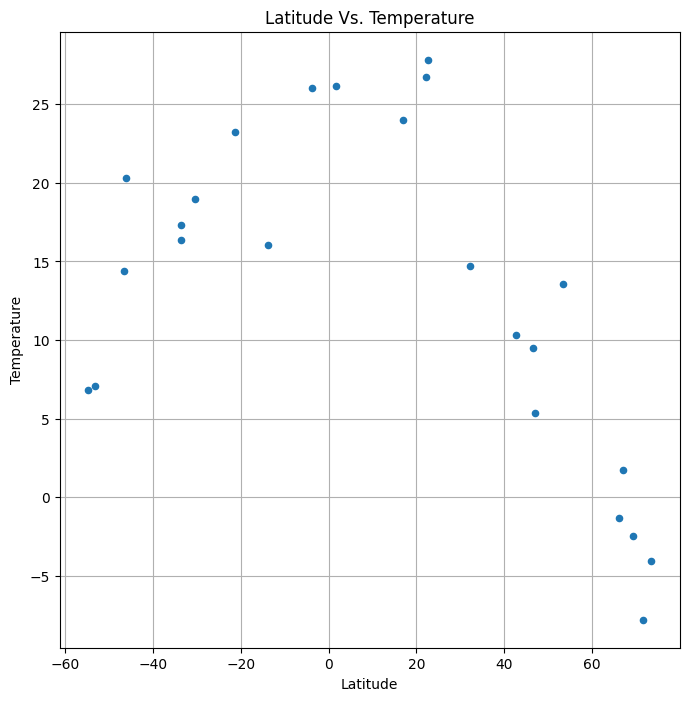

In [32]:
cities_df.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature")
plt.show()

After each plot, add one to two sentences to explain what the code is analyzing

## Latitude vs. Humidity Plot

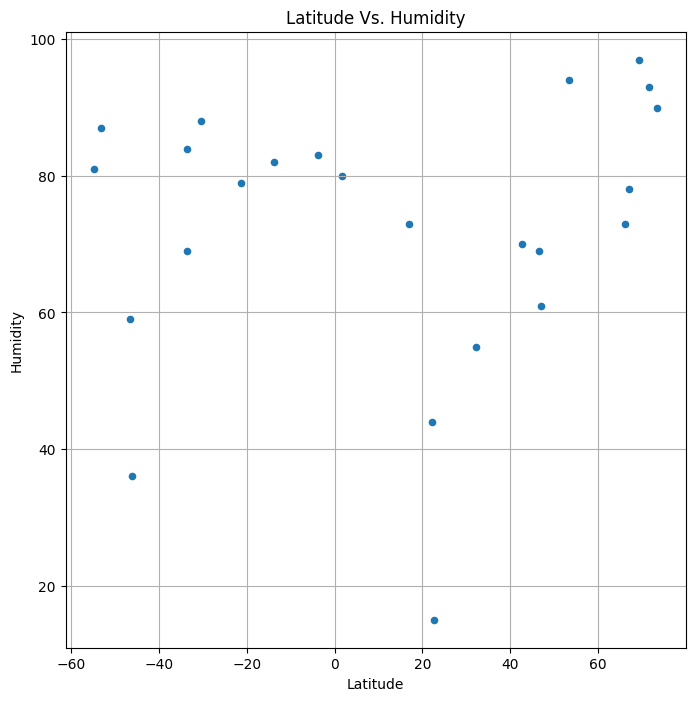

In [33]:
cities_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude Vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

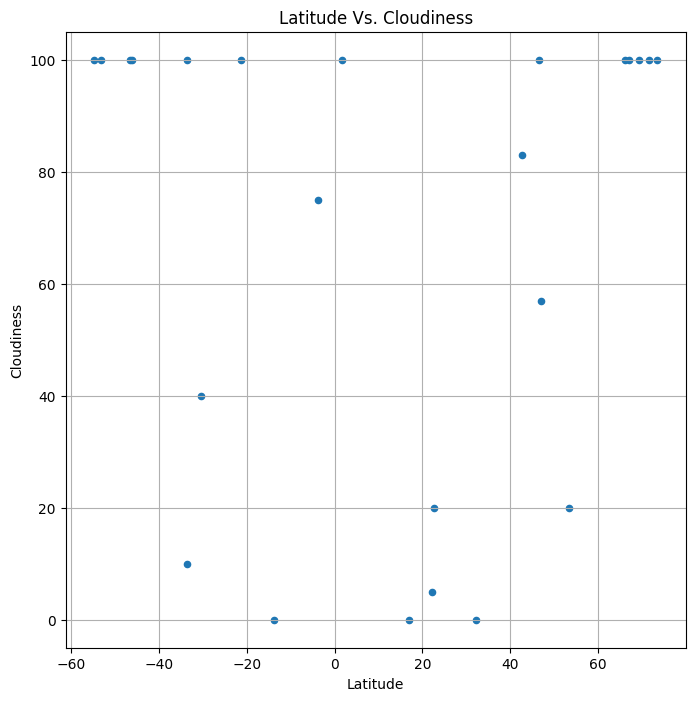

In [34]:
cities_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

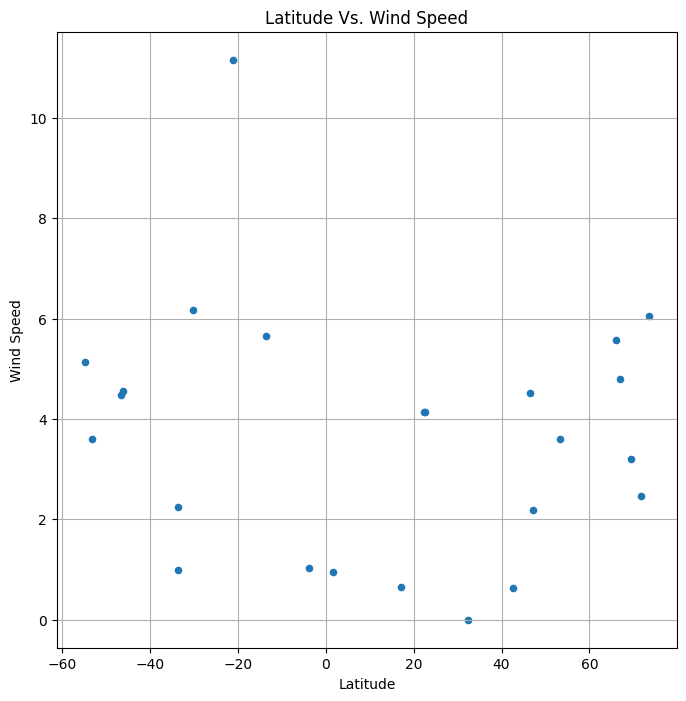

In [35]:
cities_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude Vs. Wind Speed")
plt.show()

## Linear Regression

The second requirement is to compute the linear regression for each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

- Northern Hemisphere: Temperature (F) vs. Latitude
- Southern Hemisphere: Temperature (F) vs. Latitude
- Northern Hemisphere: Humidity (%) vs. Latitude
- Southern Hemisphere: Humidity (%) vs. Latitude
- Northern Hemisphere: Cloudiness (%) vs. Latitude
- Southern Hemisphere: Cloudiness (%) vs. Latitude
- Northern Hemisphere: Wind Speed (mph) vs. Latitude
- Southern Hemisphere: Wind Speed (mph) vs. Latitude


In [46]:
north_df = cities_df.loc[cities_df['Latitude']>0]

In [47]:
south_df = cities_df.loc[cities_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8910560406685252


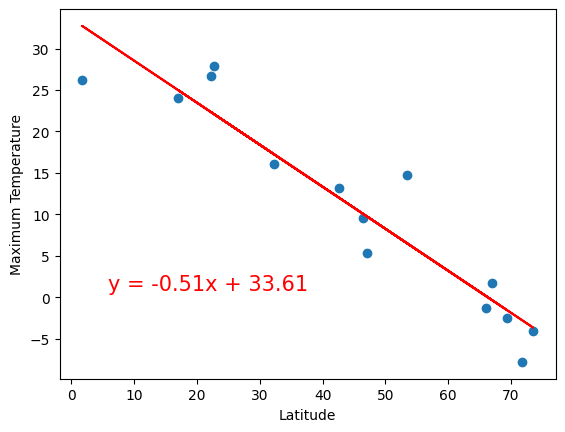

In [48]:
x_values = north_df['Latitude']
y_values = north_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6004895017410721


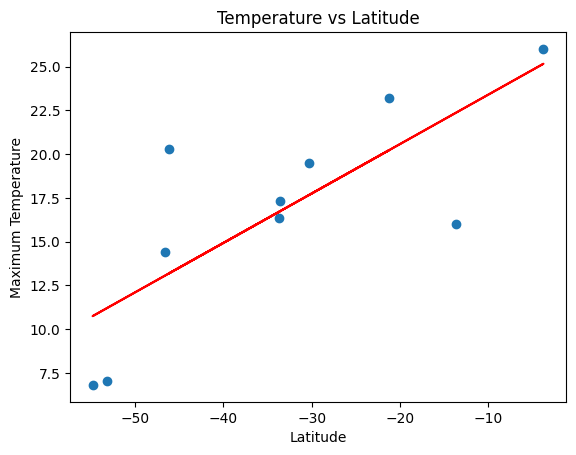

In [50]:
x_values = south_df['Latitude']
y_values = south_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Temperature vs Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3157371185985978


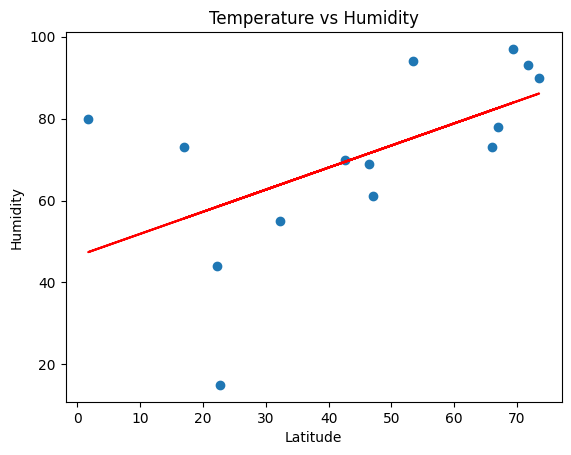

In [52]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10546891044956326


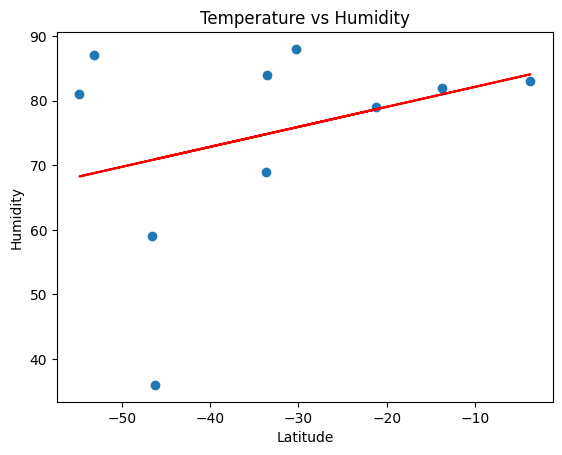

In [53]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3152553295100045


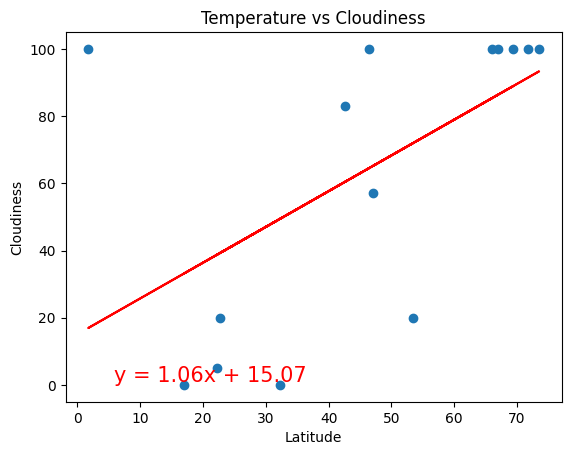

In [54]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Temperature vs Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22743135028160394


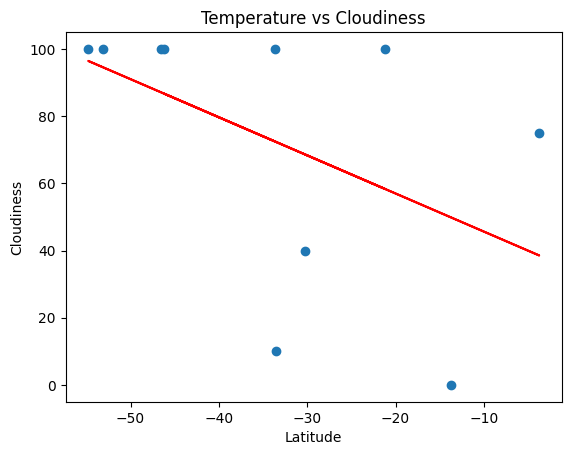

In [55]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Temperature vs Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


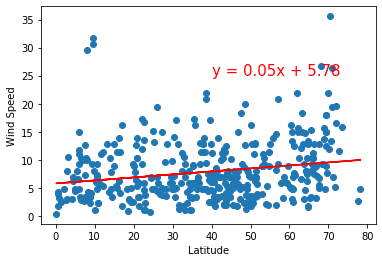

In [ ]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Cloudiness vs Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006303742027431609


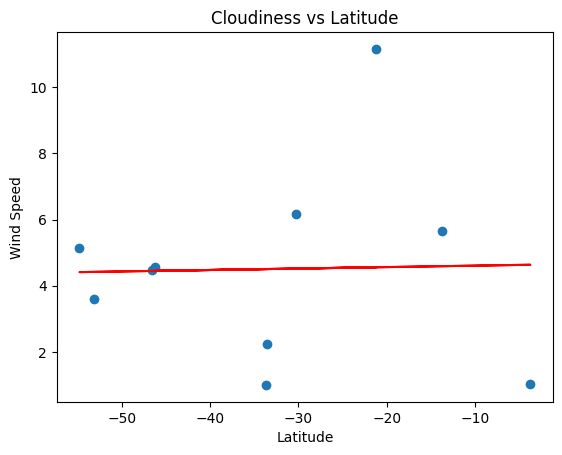

In [56]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Cloudiness vs Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()